Автор: Богатырева Виктория

Дата: 06.02.25 

# Изучение рынка заведений общественного питания Москвы

### Описание проекта

Инвесторы из фонда решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан или бар. Расположение, меню и цены пока тоже обсуждаются. Для начала заказчики просят вас — аналитика — провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

Вам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

## План работ

[Загрузка данных и знакомство с ними](#11)

[Предобработка данных](#12)

[Исследовательский анализ данных](#13)

[Общий вывод](#14)

[Новый общий вывод](#15)

[Рекомендации](#16)

## Загрузка данных и знакомство с ними
<a id="11"></a>

 - Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: /datasets/rest_info.csv и /datasets/rest_price.csv.

In [1]:
!pip install squarify

In [2]:
!pip install phik

In [3]:
# Импортируем библиотеки
import pandas as pd

from scipy.stats import median_abs_deviation

# Глобально изменить настройки вывода, чтобы отображать все строки
pd.set_option('display.max_rows', None)

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

import squarify 

plt.style.use('ggplot')

#%matplotlibe inline

In [4]:
# Выгружаем данные в переменные bank_df и clients_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

 - Познакомьтесь с данными и изучите общую информацию о них.

In [5]:
# выводим информацию о датафрейме rest_info_df
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
rest_info_df.head(5)


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [7]:
seats_array = rest_info_df['seats'].values
seats_array

array([ nan,   4.,  45., ..., 150., 150.,  12.], shape=(8406,))

In [8]:
# выводим информацию о датафрейме rest_price_df
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [9]:
rest_price_df.head(5)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [10]:
# посмотрим кол-во пропусков в дф rest_info_df
rest_info_df.isna().sum()

id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

In [11]:
# Подсчитываем долю строк с пропусками в процентах для дф rest_info_df
round((rest_info_df.isna().sum() / rest_info_df.shape[0]) * 100, 2)

id           0.00
name         0.00
category     0.00
address      0.00
district     0.00
hours        6.38
rating       0.00
chain        0.00
seats       42.96
dtype: float64

In [12]:
# посмотрим кол-во пропусков в дф rest_price_df
rest_price_df.isna().sum()

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

In [13]:
# Подсчитываем долю строк с пропусками в процентах для дф rest_price_df
round((rest_price_df.isna().sum() / rest_price_df.shape[0]) * 100, 2)

id                    0.00
price                18.31
avg_bill              5.96
middle_avg_bill      22.40
middle_coffee_cup    86.82
dtype: float64

 - Сделайте вывод о полученных данных: каков объём данных, соответствуют ли данные описанию, встречаются ли пропущенные значения, используются ли верные типы данных.
   

**Вывод:**

1. В дф rest_info_df --- 8406 строк. Все названия столбцов соответствуют данным в таблице. В столбцах hours и seats есть пропуски (6% и 43%). Все столбцы имеют верные типы данных, кроме столбца seats. Для него больше подойдет тип данных int8 или int16.
2. В rest_price_df --- 4058 строк. Названия столбцов соответствуют, кроме столбца price. Его нужно переименовать в category_price т к столбец содержит названия категорий. Есть пропуски в столбцах price(18%), avg_bill (6%), middle_avg_bill (22%), middle_coffee_cup (87%). Столбцам middle_avg_bill и middle_coffee_cup больше подойдет тип данных int16, у других столбцов типы данных соответствуют.

 - Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

В описании данных было указано, что в столбце chain могут встречаться ошибки (для маленьких сетей могут встречаться ошибки). Также в дф rest_price_df боьшое кол-во пропусков у многих столбцов. Нужно определить что сделать с пропусками: заменить на индикаторы или проигнорировать. Удалять их нежелательно. 

Если посмотреть на таблицы ниже, то можно увидеть что у дф rest_price_df (столбец middle_avg_bill) среднеее значение выше медианы. Это говорит о том, что данные неравномерно распределены и есть выбросы. Для столбца middle_coffee_cup среднее значение немного выше среднего. Думаю, есть незначительные выбросы. Значение std очень высокое = 1009.

У дф rest_info_df для столбца rating есть небольшая разница между средним и медианой, для столбца chain также есть небольшая разница между средним и медианой, у столбца seats большая разница между медианой и средним. Std или стандартное отклонение незначительно в столбцах rating, chain и большое в столбце seats. У столбца seats значения сильно отклоняются от среднего.

In [14]:
rest_price_df.describe()

,middle_avg_bill,middle_coffee_cup
count,3149.000000,535.000000
mean,958.053668,174.721495
std,1009.732845,88.951103
min,0.000000,60.000000
25%,375.000000,124.500000
50%,750.000000,169.000000
75%,1250.000000,225.000000
max,35000.000000,1568.000000


In [15]:
rest_info_df.describe()

,rating,chain,seats
count,8406.000000,8406.000000,4795.000000
mean,4.229895,0.381275,108.421689
std,0.470348,0.485729,122.833396
min,1.000000,0.000000,0.000000
25%,4.100000,0.000000,40.000000
50%,4.300000,0.000000,75.000000
75%,4.400000,1.000000,140.000000
max,5.000000,1.000000,1288.000000


 - Объедините данные двух датасетов в один, с которым вы и продолжите работу.
   

In [16]:
two_join_df = rest_info_df.merge(rest_price_df, on='id', how='left')

In [17]:
two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


In [18]:
# кол-во пустых строк в объединенном дф two_join_df
two_join_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [19]:
two_join_df.describe()

,rating,chain,seats,middle_avg_bill,middle_coffee_cup
count,8406.000000,8406.000000,4795.000000,3149.000000,535.000000
mean,4.229895,0.381275,108.421689,958.053668,174.721495
std,0.470348,0.485729,122.833396,1009.732845,88.951103
min,1.000000,0.000000,0.000000,0.000000,60.000000
25%,4.100000,0.000000,40.000000,375.000000,124.500000
50%,4.300000,0.000000,75.000000,750.000000,169.000000
75%,4.400000,1.000000,140.000000,1250.000000,225.000000
max,5.000000,1.000000,1288.000000,35000.000000,1568.000000


## Предобработка данных
<a id="12"></a>

1. Изучите корректность типов данных и при необходимости проведите их преобразование. Помните, что наличие пропусков в данных может влиять на их тип.

In [20]:
two_join_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [21]:
# столбец id не несет никакой смысловой нагрузки, поэтому я его удалю
two_join_df = two_join_df.drop(['id'], axis=1)

In [22]:
# считаю кол-во нулевых значений в столбце middle_avg_bill
zeros = (two_join_df['middle_avg_bill'] == 0).sum()

zeros

np.int64(1)

In [23]:
# Нет строк с 0 в столбце middle_coffee_cup
zeros_2 = (two_join_df['middle_coffee_cup'] == 0).sum()

zeros_2

np.int64(0)

In [24]:
# найден 0 в столбце middle_avg_bill, смотрю на всю строку
a = two_join_df[two_join_df['middle_avg_bill'] == 0]
a

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
3688,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",4.5,1,200.0,высокие,Средний счёт:от 0 ₽,0.0,NaN


In [25]:
# думаю тут ошибка, поэтому удаляю строку с 0
two_join_df = two_join_df[two_join_df['middle_avg_bill'] != 0]

Я хочу переименовать:
- category в type,
- price в category_price

In [26]:
two_join_df = two_join_df.rename(columns={'category': 'type',
                                         'price': 'category_price'})

Хочу поменять типы столбцам:
- seats в int16,
- middle_avg_bill в int64,
- middle_coffee_cup в int64

In [27]:
two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 8405
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8405 non-null   object 
 1   type               8405 non-null   object 
 2   address            8405 non-null   object 
 3   district           8405 non-null   object 
 4   hours              7869 non-null   object 
 5   rating             8405 non-null   float64
 6   chain              8405 non-null   int64  
 7   seats              4794 non-null   float64
 8   category_price     3314 non-null   object 
 9   avg_bill           3815 non-null   object 
 10  middle_avg_bill    3148 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 853.6+ KB


In [28]:
# Подсчитываем долю строк с пропусками в процентах для дф rest_info_df
round((two_join_df.isna().sum() / two_join_df.shape[0]) * 100, 2)

name                  0.00
type                  0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
category_price       60.57
avg_bill             54.61
middle_avg_bill      62.55
middle_coffee_cup    93.63
dtype: float64

In [29]:
display(two_join_df['seats'].isnull().sum()) # ищу пропущенные значения
display(np.isfinite(two_join_df['seats']).sum()) # ищу неконечные значения (inf -inf)

np.int64(3611)

np.int64(4794)

In [30]:
two_join_df['seats'] = two_join_df['seats'].replace([np.inf, -np.inf], np.nan)
#two_join_df['seats'] = two_join_df['seats'].fillna(0)

In [31]:
# заменяю Nan на 0
two_join_df['middle_avg_bill'] = two_join_df['middle_avg_bill'].fillna(0)
# меняю тип данных на int32
two_join_df['middle_avg_bill'] = two_join_df['middle_avg_bill'].astype('int32')

# преобразую в числа, игнорирую пропуски
two_join_df['seats'] = pd.to_numeric(two_join_df['seats'], errors='coerce')
# заполняю пропуски -1
two_join_df['seats'] = two_join_df['seats'].fillna(-1)
two_join_df['seats'] = two_join_df['seats'].astype('int32')

two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 8405
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8405 non-null   object 
 1   type               8405 non-null   object 
 2   address            8405 non-null   object 
 3   district           8405 non-null   object 
 4   hours              7869 non-null   object 
 5   rating             8405 non-null   float64
 6   chain              8405 non-null   int64  
 7   seats              8405 non-null   int32  
 8   category_price     3314 non-null   object 
 9   avg_bill           3815 non-null   object 
 10  middle_avg_bill    8405 non-null   int32  
 11  middle_coffee_cup  535 non-null    float64
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 788.0+ KB


In [32]:
# проверяю уникальные значения
two_join_df['middle_avg_bill'].unique()

array([    0,  1550,  1000,   500,   199,   250,  1100,   330,  1500,
         400,   245,   425,   900,   240,   225,   328,   300,   345,
         230,   650,   750,  1250,  1750,  2250,   600,   450,   850,
        2100,   349,   200,   120,   269,  1300,  1150,   355,   275,
        1200,   575,   350,   700,   284,   150,   362,   325,  2000,
         291,   280,  2750,  1400,  2500,  2150,  5000,   825,   625,
        3250,   675,   475,  1690,   925,  1050,   340,   950,  1025,
         321,   550,   360,   375,   317,   324,   343,   140,   165,
         215,   549,   175,   313,  1375,   100,   975, 11000,   800,
         295,  3750,  1350,   430,   130,   525,   344,   185,  1800,
         875,   480,   695,   261,  1450,  3000,   180,   404,   235,
         366,   304,  4500,   560,   470,   387,  1850,  1900,   315,
         363,   260,  2900,   210,   190,  2200,   299,  1650,   426,
        1175,  4250,   365,   630,   320,   352,   270,   390,   775,
        1600,  3500,

In [33]:
# считаю кол-во строк, где есть нули (тут все правильно, у нас было пропусков 5257, 
# теперь столько же нулевых значений в этом столбце)
count_zeros = (two_join_df['middle_avg_bill'] == 0).sum()
count_zeros

np.int64(5257)

In [34]:
# проверяю наличие нулевых значений для столбца middle_coffee_cup
counts_zero = (two_join_df['middle_coffee_cup'] == 0).sum()
counts_zero

np.int64(0)

In [35]:
# проверяю уникальные значения
two_join_df['middle_coffee_cup'].unique()

array([  nan,  170.,  145.,  150.,  180.,  120.,  100.,  256.,  160.,
        250.,  165.,  149.,  135.,  220.,  175.,  195.,   60.,  214.,
         75.,   89.,   95.,  204.,   90.,  140.,  125.,  162.,  155.,
        154.,  297.,  205.,  124.,  200.,  190.,  134.,  139.,  287.,
        225.,  230.,  237.,  290.,  254.,  279.,  174.,  179.,  295.,
        245.,  105.,  285.,  270.,   84.,  127.,   80.,  112.,  185.,
        210.,  325.,  159.,  215.,  110.,  266.,  242.,  137.,  255.,
        240.,  217.,  315.,  130.,  167.,  169.,  235., 1568.,   79.,
        260.,  300.,  291.,  275.,  115.,  328.,   94.,  265.,  184.,
        229.,  164.,  172.,  259.,  246.,  199.,  138.,  375.,  189.,
        320.,  197.,  227.,  102.,  119.,  144.,  129.])

In [36]:
# меняю Nan на 0
two_join_df['middle_coffee_cup'] = two_join_df['middle_coffee_cup'].fillna(0)
# меняю тип данных на int32
two_join_df['middle_coffee_cup'] = two_join_df['middle_coffee_cup'].astype('int32')
# еще поменяю тип данных для столбца chain с int64 на int8
two_join_df['chain'] = two_join_df['chain'].astype('int8')

two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 8405
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8405 non-null   object 
 1   type               8405 non-null   object 
 2   address            8405 non-null   object 
 3   district           8405 non-null   object 
 4   hours              7869 non-null   object 
 5   rating             8405 non-null   float64
 6   chain              8405 non-null   int8   
 7   seats              8405 non-null   int32  
 8   category_price     3314 non-null   object 
 9   avg_bill           3815 non-null   object 
 10  middle_avg_bill    8405 non-null   int32  
 11  middle_coffee_cup  8405 non-null   int32  
dtypes: float64(1), int32(3), int8(1), object(7)
memory usage: 697.7+ KB


2. Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [37]:
# я уже удалила одну строку в столбце middle_avg_bill см [20]. И заменила пропуски в столбцах 
# seats (-1), middle_avg_bill(0), middle_coffee_cup(0)
two_join_df.isna().sum()

name                    0
type                    0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
category_price       5091
avg_bill             4590
middle_avg_bill         0
middle_coffee_cup       0
dtype: int64

In [38]:
# доля пропусков в процентах
round((two_join_df.isna().sum() / two_join_df.shape[0]) * 100, 0)

name                  0.0
type                  0.0
address               0.0
district              0.0
hours                 6.0
rating                0.0
chain                 0.0
seats                 0.0
category_price       61.0
avg_bill             55.0
middle_avg_bill       0.0
middle_coffee_cup     0.0
dtype: float64

In [39]:
# вывожу строки с пропусками в столбце hours
missing = two_join_df[two_join_df['hours'].isna()]
missing.head(10)

,name,type,address,district,hours,rating,chain,seats,category_price,avg_bill,middle_avg_bill,middle_coffee_cup
38,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,-1,NaN,NaN,0,0
40,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,-1,NaN,NaN,0,0
44,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8,NaN,NaN,0,0
56,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,-1,NaN,NaN,0,0
108,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,-1,NaN,NaN,0,0
123,Кафе,кафе,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,4.3,0,50,NaN,NaN,0,0
126,Кулинария,кафе,"Москва, Череповецкая улица, 17",Северо-Восточный административный округ,NaN,3.9,1,-1,NaN,NaN,0,0
138,Хинкальная,быстрое питание,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,4.1,1,50,NaN,NaN,0,0
217,16 Июня,кафе,"Москва, бульвар Академика Ландау, 3",Северо-Восточный административный округ,NaN,1.4,0,-1,NaN,NaN,0,0
274,Чайхана,кафе,"Москва, Широкая улица, 12",Северо-Восточный административный округ,NaN,3.0,1,50,NaN,NaN,0,0


Не хочу удалять пропуски т к пропусков в трех столбцах больше 5%, я их заменю на строковые значения.

Пропуски есть в трех столбцах hours, category_price, avg_bill. Пропуски в hours остались неизменны (их было 536 до присоединения датафреймов). А вот пропуски в столбцах category_price, avg_bill увеличелись из-за присоединения двух датафреймов. В дф rest_info_df было 8406 строк, а в rest_price_df 4058 строк. Я объединила датафреймы по лефт джоин и из-за этого появилось так много пропусков, но зато не потерялась важная информация. 

In [40]:
# заменяю пропуски в трех столбцах 
two_join_df['hours'] = two_join_df['hours'].fillna('нет_данных')
two_join_df['category_price'] = two_join_df['category_price'].fillna('нет_данных')
two_join_df['avg_bill'] = two_join_df['avg_bill'].fillna('нет_данных')

two_join_df.head(10)

,name,type,address,district,hours,rating,chain,seats,category_price,avg_bill,middle_avg_bill,middle_coffee_cup
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,нет_данных,нет_данных,0,0
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550,0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000,0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,нет_данных,Цена чашки капучино:155–185 ₽,0,170
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500,0
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,-1,средние,нет_данных,0,0
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45,средние,Средний счёт:199 ₽,199,0
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45,средние,Средний счёт:200–300 ₽,250,0
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79,средние,Средний счёт:от 500 ₽,500,0
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65,средние,Средний счёт:1000–1200 ₽,1100,0


 3. Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [41]:
# пока нет явных дубликатов
two_join_df.duplicated().sum()

np.int64(0)

In [42]:
# проверяю уникальные значения
two_join_df['type'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [43]:
two_join_df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], shape=(1308,), dtype=object)

In [44]:
two_join_df['address'].unique()

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'],
      shape=(5752,), dtype=object)

In [45]:
# столбцам задала нижние регистры
two_join_df['name'] = two_join_df['name'].str.lower()
two_join_df['address'] = two_join_df['address'].str.lower()
two_join_df['district'] = two_join_df['district'].str.lower()
two_join_df['avg_bill'] = two_join_df['avg_bill'].str.lower()

In [46]:
two_join_df.head()

,name,type,address,district,hours,rating,chain,seats,category_price,avg_bill,middle_avg_bill,middle_coffee_cup
0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,нет_данных,нет_данных,0,0
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,средний счёт:1500–1600 ₽,1550,0
2,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,средний счёт:от 1000 ₽,1000,0
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,нет_данных,цена чашки капучино:155–185 ₽,0,170
4,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,средний счёт:400–600 ₽,500,0


In [47]:
# удаляю пробелы в начале и в конце
two_join_df['name'] = two_join_df['name'].str.strip()
two_join_df['address'] = two_join_df['address'].str.strip()
two_join_df['district'] = two_join_df['district'].str.strip()
two_join_df['avg_bill'] = two_join_df['avg_bill'].str.strip()

In [48]:
# неявные дубликаты не нашла :(
two_join_df.duplicated().sum()

np.int64(0)

In [49]:
# теперь поищу дубликаты в 2х столбцах name и address
two_join_df[['name', 'address']].duplicated().sum()

np.int64(4)

In [50]:
# вывожу кол-во строк до удаления дубликатов
a = two_join_df.shape
a

(8405, 12)

In [51]:
# нашла 4 дубликата, удалю их
two_join_df = two_join_df.drop_duplicates(subset=['name', 'address'])

In [52]:
# кол-во строк после удаления дубликатов
b = two_join_df.shape
b

(8401, 12)

In [53]:
two_join_df.head()

,name,type,address,district,hours,rating,chain,seats,category_price,avg_bill,middle_avg_bill,middle_coffee_cup
0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,нет_данных,нет_данных,0,0
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,средний счёт:1500–1600 ₽,1550,0
2,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,средний счёт:от 1000 ₽,1000,0
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,нет_данных,цена чашки капучино:155–185 ₽,0,170
4,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,средний счёт:400–600 ₽,500,0


4. Для дальнейшей работы выделите новые столбцы:

Создайте столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
 * логическое значение True — если заведение работает ежедневно и круглосуточно;
 * логическое значение False — в противоположном случае.

In [54]:
new_list = []

for item in two_join_df['hours']:
    if item == 'ежедневно, круглосуточно':
        new_list.append('True')
    else:
        new_list.append('False')

two_join_df['is_24_7'] = new_list       

In [55]:
two_join_df.head()

,name,type,address,district,hours,rating,chain,seats,category_price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,нет_данных,нет_данных,0,0,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,средний счёт:1500–1600 ₽,1550,0,False
2,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,средний счёт:от 1000 ₽,1000,0,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,нет_данных,цена чашки капучино:155–185 ₽,0,170,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,средний счёт:400–600 ₽,500,0,False


In [56]:
# получается 729 заведений, к-е работают круглосуточно
display(two_join_df['is_24_7'].value_counts())

is_24_7
False    7672
True      729
Name: count, dtype: int64

 * После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.
   

**Вывод**

Провела предобработку данных. Заменила пропуски на индикаторы и слова. Добавила новый столбец is_24_7. Удалила пропуски:
 * удалила 1 строку с нулевым значением в столбце middle_avg_bill
 * удалила 4 строки-дубликаты (совпадения нашла в столбцах name, address) 

## Исследовательский анализ данных
<a id="13"></a>
Проведите исследовательский анализ исходных данных и ответьте на вопросы:

1. Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [57]:
y = two_join_df['type'].value_counts()
y

type
кафе               2376
ресторан           2042
кофейня            1412
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

<Axes: title={'center': 'Анализ объектов общественного питания в Москве'}, xlabel='Категории заведений', ylabel='Количество заведений'>

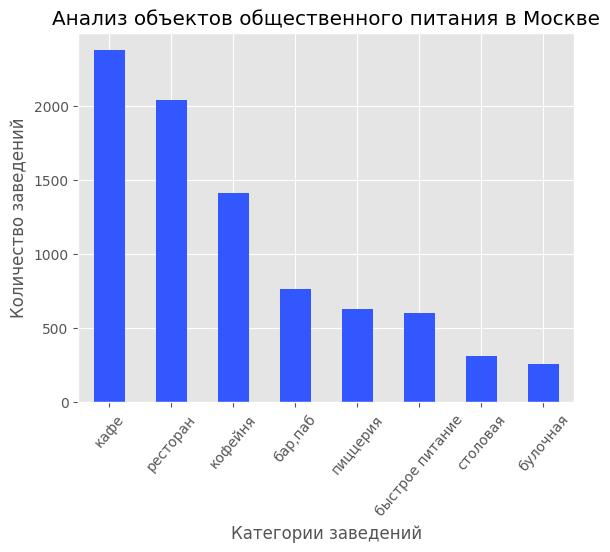

In [58]:
y.plot(kind='bar',
      title='Анализ объектов общественного питания в Москве',
      ylabel='Количество заведений',
      xlabel='Категории заведений',
      color='#3357FF',
      rot = 50
)

**Вывод**: на графике выше можно увидеть что заведений с категорией "Кафе" больше всего, а с категорией "Булочная" - минимум.

2. Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [59]:
# вывожу уникальные районы
two_join_df['district'].unique()

array(['северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'западный административный округ',
       'центральный административный округ',
       'восточный административный округ',
       'юго-восточный административный округ',
       'южный административный округ',
       'юго-западный административный округ'], dtype=object)

In [60]:
# вывожу список, так не очень удобно смотреть информацию. ниже вывела в удобном формате
#kol_vo = two_join_df.groupby(['district', 'type'])['type'].count()
#kol_vo

In [61]:
# данные представлены в удобном формате
pivot_df = pd.pivot_table(two_join_df, index='type', columns='district', aggfunc='size')
pivot_df.T

type,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
восточный административный округ,53,25,71,272,105,72,160,40
западный административный округ,50,37,62,238,150,71,218,24
северный административный округ,68,39,58,234,193,77,188,41
северо-восточный административный округ,62,28,82,269,159,68,182,40
северо-западный административный округ,23,12,30,115,62,40,109,18
центральный административный округ,364,50,87,464,427,113,670,66
юго-восточный административный округ,38,13,67,282,89,55,145,25
юго-западный административный округ,38,27,61,238,96,64,168,17
южный административный округ,68,25,85,264,131,73,202,44


In [62]:
#в ЦАО 2241 заведений
cao = two_join_df['district'].value_counts()
cao

district
центральный административный округ         2241
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: count, dtype: int64

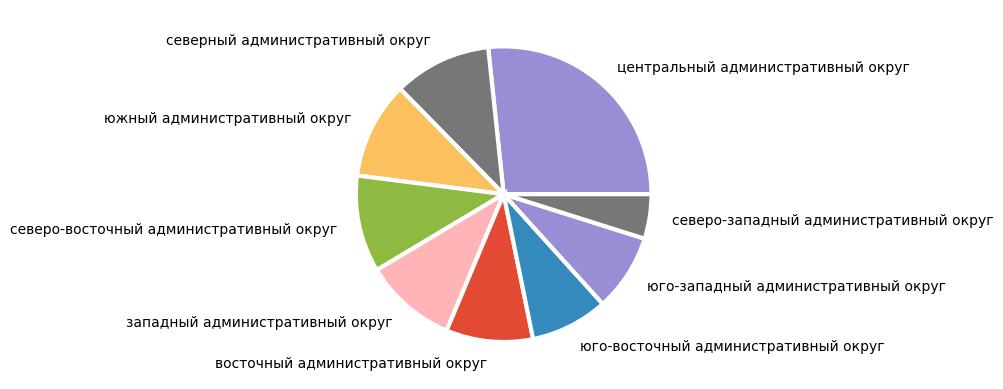

In [63]:
# вторая визуализация
names='центральный административный округ', 'северный административный округ', 'южный административный округ', 'северо-восточный административный округ', 'западный административный округ', 'восточный административный округ', 'юго-восточный административный округ', 'юго-западный административный округ', 'северо-западный административный округ'

plt.pie(cao)

plt.pie(cao, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

**Вывод**: в ЦАО больше всего заведений общественного питания. В САО, ЮАО и СВАО расположено почти равное кол-во заведений.

In [64]:
# фильтрую данные и вывожу только строки с ЦАО
filtered_df = two_join_df.loc[two_join_df['district'] == 'центральный административный округ']
#filtered_df

In [65]:
# группирую и сортирую данные для ЦАО
kol_vo_items = filtered_df.groupby('type')['type'].count()
sor_val = kol_vo_items.sort_values(ascending=False)
sor_val

type
ресторан           670
кафе               464
кофейня            427
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: type, dtype: int64

<Axes: title={'center': 'Распределение заведений каждой категории в ЦАО'}, xlabel='Категории заведений', ylabel='Количество заведений'>

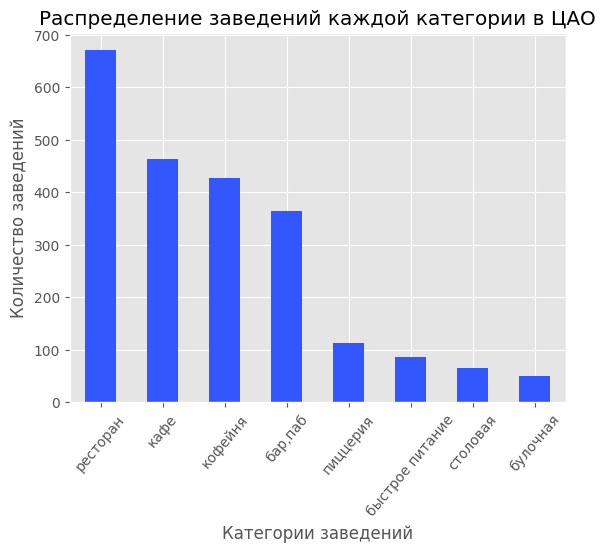

In [66]:
sor_val.plot(kind='bar',
      title='Распределение заведений каждой категории в ЦАО',
      ylabel='Количество заведений',
      xlabel='Категории заведений',
      color='#3357FF',
      rot=50
)


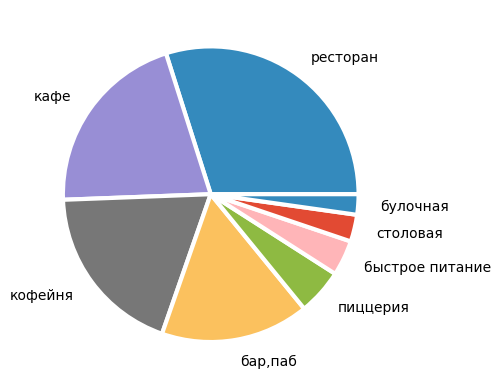

In [67]:
# третья визуализация
names='ресторан', 'кафе', 'кофейня', 'бар,паб', 'пиццерия', 'быстрое питание', 'столовая', 'булочная'

plt.pie(sor_val)

plt.pie(sor_val, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

**Вывод**: в ЦАО ресторанов больше чем кафе, хотя в целом по Москве кафе больше. Кофейни лишь ненамного отстаю от кафе.

3. Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [68]:
#  0 — заведение не является сетевым; 1 — заведение является сетевым.
chain_0_1 = two_join_df['chain'].value_counts()
chain_0_1

chain
0    5199
1    3202
Name: count, dtype: int64

In [69]:
# процент несетевых и сетевых заведений
round(two_join_df['chain'].value_counts(normalize=True) * 100, 1)

chain
0    61.9
1    38.1
Name: proportion, dtype: float64

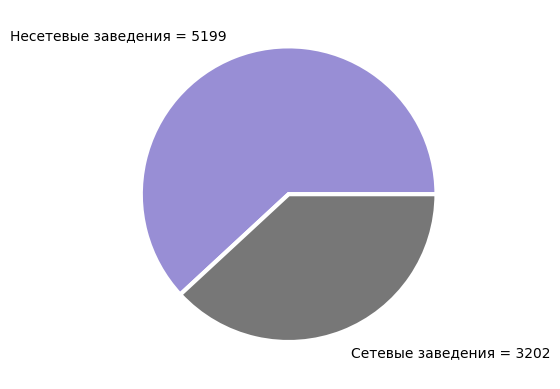

In [70]:
# круговая визуализация
names='Несетевые заведения = 5199', 'Сетевые заведения = 3202'

plt.pie(chain_0_1)

plt.pie(chain_0_1, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

In [71]:
# общая сумма заведений (сетевых и несетевых)
total_sum_chain = two_join_df['type'].value_counts()
total_sum_chain

type
кафе               2376
ресторан           2042
кофейня            1412
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

In [72]:
# тут выясняю кол-во сетевых и несетевых заведений
kol_vo_chain = two_join_df.groupby(['type', 'chain'])['chain'].count().unstack(fill_value=0)
chain_sort = kol_vo_chain.sort_values(ascending=False, by=0)
chain_sort

chain,0,1
type,,
кафе,1597,779
ресторан,1313,729
кофейня,693,719
"бар,паб",596,168
быстрое питание,371,232
пиццерия,303,330
столовая,227,88
булочная,99,157


In [73]:
# тут столбец с кол-вом сетевых заведений делю на общ кол-во заведений
# получила результат в процентах
persent_of_set = (chain_sort[1] / total_sum_chain) * 100
sort_persenr_of_set = persent_of_set.sort_values(ascending=False)
sort_persenr_of_set

type
булочная           61.328125
пиццерия           52.132701
кофейня            50.920680
быстрое питание    38.474295
ресторан           35.700294
кафе               32.786195
столовая           27.936508
бар,паб            21.989529
dtype: float64

<Axes: title={'center': 'Категории заведений, которые чаще являются сетевыми'}, xlabel='Категории заведений', ylabel='Количество сетевых заведений в %'>

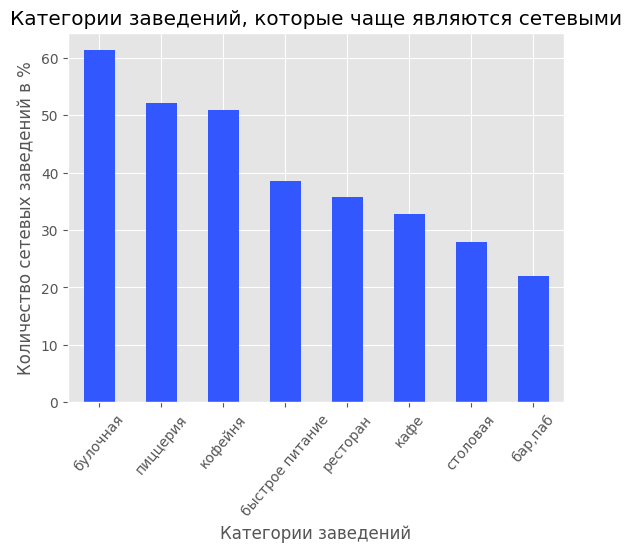

In [74]:
sort_persenr_of_set.plot(kind='bar',
      title='Категории заведений, которые чаще являются сетевыми',
      ylabel='Количество сетевых заведений в %',
      xlabel='Категории заведений',
      color='#3357FF',
      rot=50
)


<Axes: title={'center': 'Распределение сетевых, несетевых заведений каждой категории в Москве'}, xlabel='Категории заведений', ylabel='Количество заведений'>

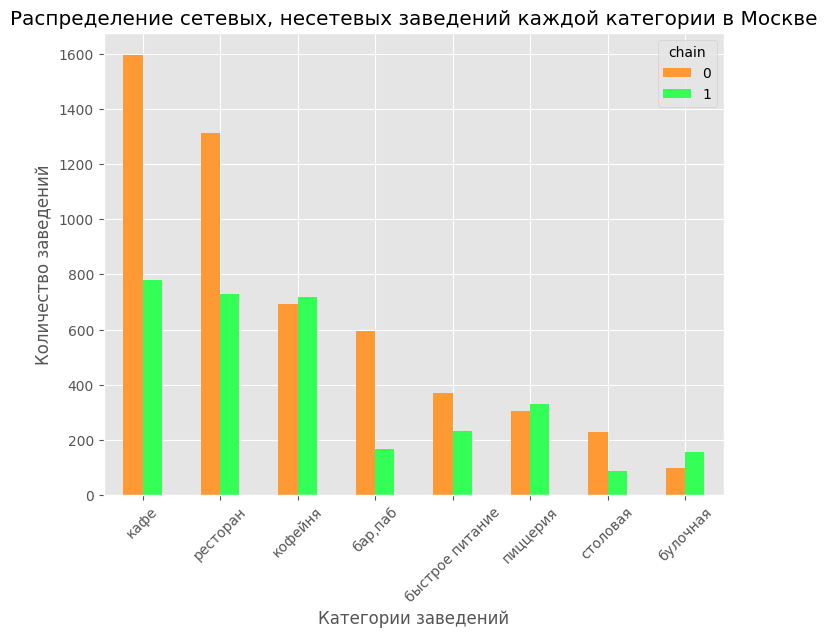

In [75]:
chain_sort.plot(kind='bar',
      title='Распределение сетевых, несетевых заведений каждой категории в Москве',
      ylabel='Количество заведений',
      xlabel='Категории заведений',
      color=['#FF9933', '#33FF57'],
      figsize=(8, 6),
      rot=45
)

**Вывод**

**По процентному соотношению между сетевыми заведениями**: первое место занимает категория "Булочная". Заведения данной категории чаще являются сетевыми (61%). Второе и третье места это категории "Пиццерия" и "Кофейня" (52% и 51%). На последнем месте категория "Бар, паб" (22%)

**По количеству заведений** несетевых заведений больше в Москве, чем сетевых. По категориям можно увидеть что больше всего сетевых заведений у категории "кафе", "ресторан" - на втором месте, а меньше всего у "столовой". 

4. Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.

**Коммент от Артема** 

Возможные варианты обработки: 
1. Если заглушек немного, можно удалить соответствующие строки, чтобы не искажать корреляцию.
2. Если заглушек много, возможны два подхода: -
   * Исследовать корреляцию отдельно для этих столбцов, чтобы не терять данные в остальных.
   * Заменить заглушки на NaN и работать с пропусками (например, используя метод dropna() или fillna() в зависимости от задачи).

In [76]:
# в seats было 43% пропусков, их заменила на -1
# т к их много, то с ними нужно работать
# заменю индикаторы на Nan и заменю пропуски на средние значения по категориям
two_join_df['seats'] = two_join_df['seats'].replace(-1, np.nan)

In [77]:
# кол-во пропусков nan в seats
two_join_df['seats'].isna().sum()

np.int64(3610)

In [78]:
# меняю тип данных полю seats
two_join_df['seats'] = pd.to_numeric(two_join_df['seats'], errors='coerce')

In [79]:
two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8401 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8401 non-null   object 
 1   type               8401 non-null   object 
 2   address            8401 non-null   object 
 3   district           8401 non-null   object 
 4   hours              8401 non-null   object 
 5   rating             8401 non-null   float64
 6   chain              8401 non-null   int8   
 7   seats              4791 non-null   float64
 8   category_price     8401 non-null   object 
 9   avg_bill           8401 non-null   object 
 10  middle_avg_bill    8401 non-null   int32  
 11  middle_coffee_cup  8401 non-null   int32  
 12  is_24_7            8401 non-null   object 
dtypes: float64(2), int32(2), int8(1), object(8)
memory usage: 795.8+ KB


:!: Думаю, тут ошибка в количестве мест. Для этих категорий это очень большое кол-во посадочных мест.Я заменю данные 1288, 1200, 1040, 920 на Nan.


In [80]:
# думаю что в данных допустили ошибку, и поэтому заменила значения
two_join_df['seats'] = two_join_df['seats'].replace([1288, 1200, 1040, 920], [np.nan, np.nan, np.nan, np.nan])


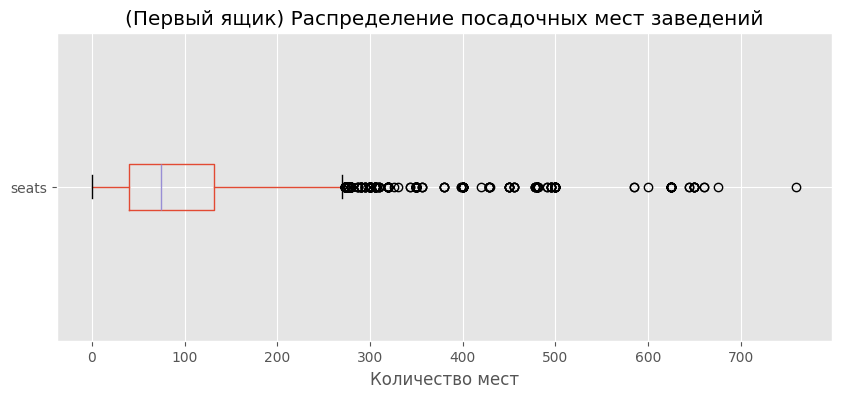

In [81]:
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats (это диаграмма до удаления выбросов)
two_join_df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('(Первый ящик) Распределение посадочных мест заведений')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

**Вывод № 1 (внизу еще вывод)**: медиана расположена немного левее от центра, медиана меньше среднего. Разница между медианой и средним зн. указывает на экстримальные значения. Очень много выбросов с правой стороны (особенно в диапазоне от 250-340, точки плотно расположены друг к другу). Есть несколько выбросов в позиции 580-780. Есть 2 уса у ящика, левый ус короче, чем правый. Данные распределены неравномерно. Большие значения находятся в правой части. 

Увидела аномальные значения...заменила данные 1288, 1200, 1040, 920 на Nan. Не уверена что так можно делать, но предварительно гуглила некоторые заведения и на сайте не было указано такое большое кол-во посадочных мест. 

In [82]:
two_join_df['seats'].describe()

count    4773.000000
mean      104.274041
std       103.298258
min         0.000000
25%        40.000000
50%        75.000000
75%       132.000000
max       760.000000
Name: seats, dtype: float64

In [83]:
# вычисляю квартили
Q1 = two_join_df['seats'].quantile(0.25)
Q3 = two_join_df['seats'].quantile(0.75)
IQR = Q3 - Q1
Q1

np.float64(40.0)

In [84]:
Q3

np.float64(132.0)

In [85]:
two_join_df['seats'].unique()

array([ nan,   4.,  45., 148.,  79.,  65., 102., 180.,  96.,  25.,  46.,
        40., 247.,  21.,   8.,  35., 240.,  85.,  12.,  60., 120.,  16.,
        80.,  50.,  44.,  43.,  90.,   0., 198.,  95., 350., 124.,  10.,
        70.,  48.,   6.,  98.,  30.,  52.,  20.,   2.,  18.,  22.,  15.,
        28., 300.,  75.,  32., 100., 110., 230., 250., 130.,  84., 398.,
        27., 286., 145.,  36.,  97., 226., 140., 166., 202.,  94., 189.,
        53., 104.,  72., 131., 105.,  55.,  17.,   1., 115., 310.,  77.,
       160., 320.,  34., 150., 200., 107.,  26.,  24.,  49., 220., 125.,
         7., 500., 210., 225., 273., 106., 112., 176.,  69., 229.,  62.,
         9., 239., 246.,  42., 188., 174.,  14.,  76., 232.,  68., 625.,
        83.,  92., 128., 245.,  58.,  67.,  82.,   3.,  63.,  38.,  56.,
       190.,  47.,  61., 307., 138., 217.,  64.,  78.,   5., 343., 147.,
        88.,  86.,  74., 420., 170., 132.,  93., 326., 126., 143.,  29.,
       252., 481.,  54., 212., 167., 356.,  19.,  8

**Проверка:** тут решила проверить данные на количество мест. Честно гуглила и потратила время, возможно зря, не знаю. У многих мест нет таких больших посадочных мест. И я заменила кол-во мест на пропуски т к тоже не знаю сколько там мест. И вывела второй боксплот с уже отфильтрованными данными без Nan ниже. 

In [86]:
# заменила значение на Nan т к считаю что тут неправильное кол-во
two_join_df['seats'] = two_join_df['seats'].replace(660.0, np.nan)

In [87]:
# удалила строку т к не нашла в инете это заведение
two_join_df = two_join_df[two_join_df['seats'] != 675.0]

In [88]:
# заменила значение на Nan т к считаю что тут неправильное кол-во
two_join_df['seats'] = two_join_df['seats'].replace(644.0, np.nan)

In [89]:
# заменила значение на Nan т к считаю что тут неправильное кол-во
two_join_df['seats'] = two_join_df['seats'].replace(650.0, np.nan)

In [90]:
# удалила строку т к не нашла в инете это заведение
two_join_df = two_join_df[two_join_df['seats'] != 760.0]

In [91]:
# удалила строку т к не нашла в инете это заведение
two_join_df = two_join_df[two_join_df['name'] != 'пончики от бабушки']

In [92]:
# заменила значение на Nan т к считаю что тут неправильное кол-во
two_join_df['seats'] = two_join_df['seats'].replace(585.0, np.nan)

In [93]:
# заменила значение на Nan т к считаю что тут неправильное кол-во
two_join_df['seats'] = two_join_df['seats'].replace(491.0, np.nan)

In [94]:
# среднее выше медианы, но уже не так сильно как раньше
two_join_df['seats'].describe()

count    4757.000000
mean      102.502628
std        98.773659
min         0.000000
25%        40.000000
50%        75.000000
75%       130.000000
max       625.000000
Name: seats, dtype: float64

In [95]:
# тут убираю пропуски из seats и создаю новое название result_without_nan
# дф result_without_nan использую только в этой задаче
result_without_nan = two_join_df.dropna(subset=['seats'])

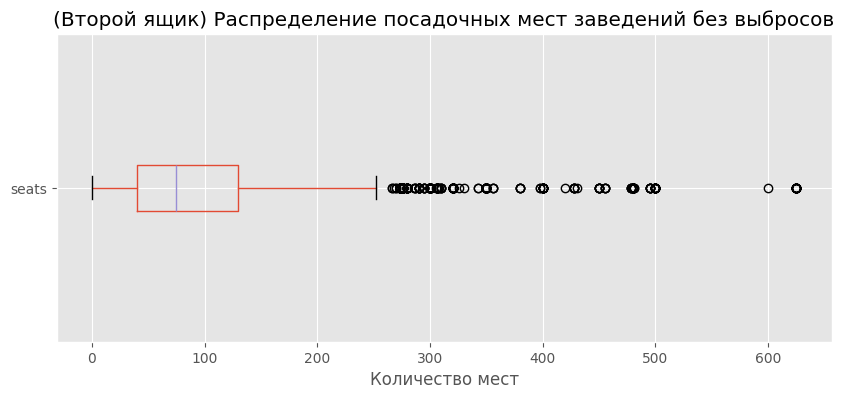

In [96]:
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
result_without_nan.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('(Второй ящик) Распределение посадочных мест заведений без выбросов')
plt.xlabel('Количество мест')

# Выводим график
plt.show()


На этом боксплоте есть выбросы от 250 до 600. Левый ус короче правого. В правой части данные имеют больше вариативности. Медиана расположена левее. Это говорит о том, что большая часть данных относится к левой стороне. Также видно, что медиана меньше среднего значения.

In [97]:
# найду медиану, чтобы показать наиболее типичное для каждой категории кол-во мест
median_category = two_join_df.groupby('type')['seats'].median()
median_sort = median_category.sort_values(ascending=False)
median_sort

type
ресторан           86.0
бар,паб            80.0
кофейня            80.0
столовая           75.0
быстрое питание    65.0
кафе               60.0
пиццерия           53.5
булочная           50.0
Name: seats, dtype: float64

<Axes: title={'center': 'Распределение типичного кол-ва мест для каждой категории'}, xlabel='Категории заведений', ylabel='Количество посадочных мест'>

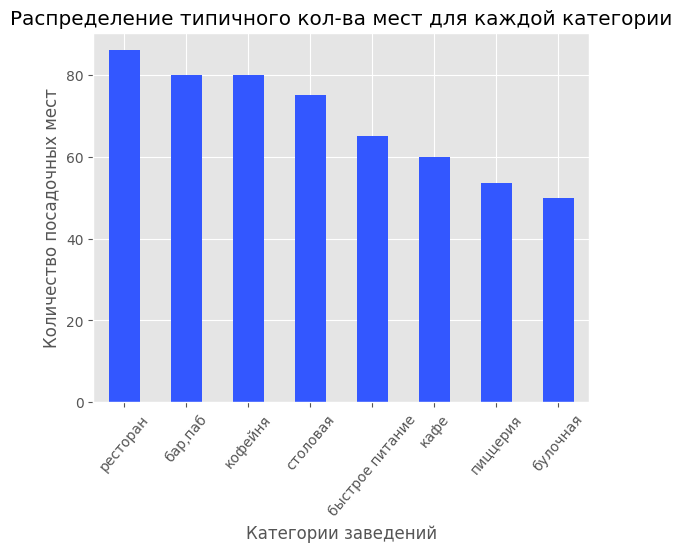

In [98]:
median_sort.plot(kind='bar',
      title='Распределение типичного кол-ва мест для каждой категории',
      ylabel='Количество посадочных мест',
      xlabel='Категории заведений',
      color='#3357FF',
      rot=50
)


**Вывод № 2**: количество мест уже более, менее похоже на правду. Я решила проверить много заведений с большим количеством мест от 1288 до 491 и многие из них были с ошибочным кол-вом посадочных мест. Например, кофейня с кол-вом мест 500+ и т д. Большие значения заменила на Nan т к не знаю сколько там посадочных мест. 

5. Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

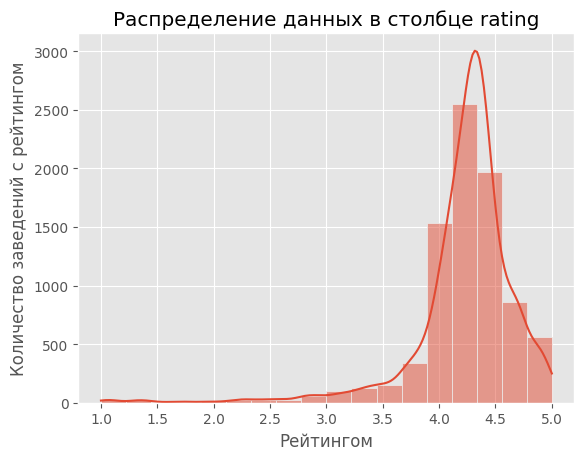

In [99]:
sns.histplot(data=two_join_df, x='rating', bins=18, kde=True)

# Подписываем и отображаем график
plt.title('Распределение данных в столбце rating')
plt.ylabel('Количество заведений с рейтингом')
plt.xlabel('Рейтингом')
plt.show()

In [100]:
# тут есть незаполненные значения 1. и т д, добавлю им нули
two_join_df['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6])

In [101]:
# меняю тип данных столбцу
two_join_df['rating'] = two_join_df['rating'].astype(str)

In [102]:
two_join_df['rating'].unique()

array(['5.0', '4.5', '4.6', '4.4', '4.7', '4.8', '4.3', '4.9', '4.2',
       '4.1', '4.0', '3.8', '3.9', '3.7', '3.6', '2.8', '2.7', '3.1',
       '1.5', '2.0', '1.4', '3.3', '3.5', '3.2', '2.9', '3.0', '3.4',
       '2.3', '2.2', '2.5', '2.6', '1.7', '1.0', '1.1', '2.4', '1.3',
       '1.2', '2.1', '1.8', '1.9', '1.6'], dtype=object)

In [103]:
# удаляю пробелы
two_join_df['rating'] = two_join_df['rating'].replace(r'\s+', '', regex=True)

# удаляю скрытые символы
two_join_df['rating'] = two_join_df['rating'].replace(r'[^\d.]', '', regex=True)

In [104]:
# Преобразуем столбец в тип float
two_join_df['rating'] = pd.to_numeric(two_join_df['rating'], errors='coerce')


In [105]:
# я не понимаю почему значения все рано с пробелами... 
# оставлю как есть потому что не получилось заменить их на 1.0, 2.0 и т д
two_join_df['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6])

In [106]:
two_join_df['rating'].value_counts()

mean_rating = two_join_df.groupby('type')['rating'].mean()
rating_sort = mean_rating.sort_values(ascending=False)
rating_sort

type
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290299
кофейня            4.277125
булочная           4.268359
столовая           4.211429
кафе               4.123884
быстрое питание    4.050249
Name: rating, dtype: float64

<Axes: title={'center': 'Распределение усредненного рейтинга заведений для каждой категории'}, xlabel='Категории заведений', ylabel='Рейтинг'>

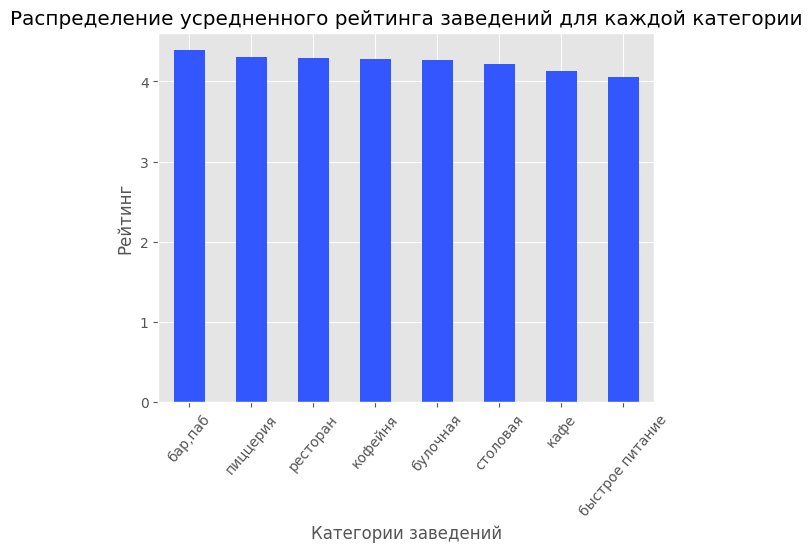

In [107]:
rating_sort.plot(kind='bar',
      title='Распределение усредненного рейтинга заведений для каждой категории',
      ylabel='Рейтинг',
      xlabel='Категории заведений',
      color='#3357FF',
      rot=50
)


**Вывод**: усредненный рейтинг практически не отличается. Усредненный рейтинг 4+ у всех категорий заведений. По графику "Распределение данных в столбце rating" видно что больше всего заведений с рейтингом 4.3 - 4.4

6. Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [108]:
# заменю индикаторы 0 на Nan в столбце middle_avg_bill
two_join_df['middle_avg_bill'] = two_join_df['middle_avg_bill'].replace(0, np.nan)

# заменю индикаторы 0 на Nan в столбце middle_coffee_cup
two_join_df['middle_coffee_cup'] = two_join_df['middle_coffee_cup'].replace(0, np.nan)

In [109]:
two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8398 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8398 non-null   object 
 1   type               8398 non-null   object 
 2   address            8398 non-null   object 
 3   district           8398 non-null   object 
 4   hours              8398 non-null   object 
 5   rating             8398 non-null   float64
 6   chain              8398 non-null   int8   
 7   seats              4757 non-null   float64
 8   category_price     8398 non-null   object 
 9   avg_bill           8398 non-null   object 
 10  middle_avg_bill    3148 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  is_24_7            8398 non-null   object 
dtypes: float64(4), int8(1), object(8)
memory usage: 861.1+ KB


In [110]:
two_join_df.isna().sum()

name                    0
type                    0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3641
category_price          0
avg_bill                0
middle_avg_bill      5250
middle_coffee_cup    7863
is_24_7                 0
dtype: int64

In [111]:
# Подсчитываем долю строк с пропусками в процентах для дф rest_info_df
round((two_join_df.isna().sum() / two_join_df.shape[0]) * 100, 2)

name                  0.00
type                  0.00
address               0.00
district              0.00
hours                 0.00
rating                0.00
chain                 0.00
seats                43.36
category_price        0.00
avg_bill              0.00
middle_avg_bill      62.51
middle_coffee_cup    93.63
is_24_7               0.00
dtype: float64

In [112]:
# cчитаю пхик
correlation_matrix_1 = two_join_df[['type', 'chain', 'category_price',
                                    'district', 'seats', 'rating', 'is_24_7']].phik_matrix() 
# вывожу результаты
display('Корреляционная матрица с коэффициентом phi_k для датафрейма:')
display(correlation_matrix_1)

interval columns not set, guessing: ['chain', 'seats', 'rating']


'Корреляционная матрица с коэффициентом phi_k для датафрейма:'

,type,chain,category_price,district,seats,rating,is_24_7
type,1.000000,0.265658,0.329981,0.174466,0.114934,0.189820,0.245476
chain,0.265658,1.000000,0.089476,0.064201,0.062790,0.107667,0.042552
category_price,0.329981,0.089476,1.000000,0.202581,0.088942,0.281420,0.064401
district,0.174466,0.064201,0.202581,1.000000,0.361156,0.200839,0.077071
seats,0.114934,0.062790,0.088942,0.361156,1.000000,0.000000,0.068610
rating,0.189820,0.107667,0.281420,0.200839,0.000000,1.000000,0.150549
is_24_7,0.245476,0.042552,0.064401,0.077071,0.068610,0.150549,1.000000


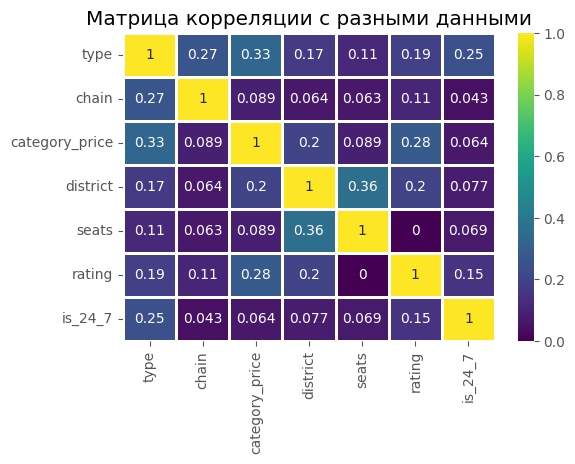

In [113]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_1, annot=True, cmap='viridis', linewidths=1)
plt.title('Матрица корреляции с разными данными')
plt.show()

По хитмэпу видно 3 карреляции:
- seats и type = 0.11 (было 0.5) - проверю эту зависимость
- category_priice и type = 0.3 
- category_price и rating = 0.28 - проверю эту зависимость

Все зависимости положительные: 

- От категории заведения зависит количество посадочных мест.
- От ценовой категории завист тип заведения.
- От ценовой категории зависит рейтинг. 

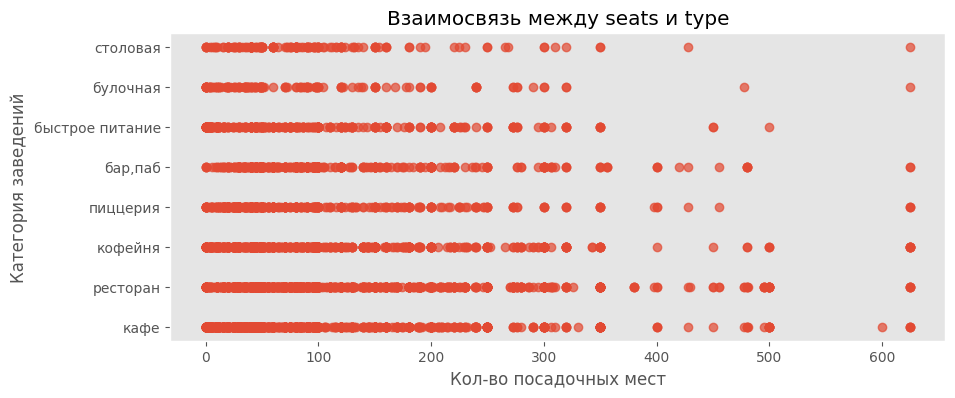

In [114]:
# строю диаграмму рассеяния для seats и type = 0.5

# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(two_join_df['seats'],
         two_join_df['type'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между seats и type')
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Категория заведений')
plt.grid()


# Отображаем график
plt.show()

На линейном графике можно увидеть распределение кол-ва посадочных мест для категорий заведений. seats и type = 0.11 - средняя взаимосвязь у столбцов. Категории столовая, булочная и быстрое питание имеют большой разброс значений. Я сильно сомневаюсь что есть булочные с количеством мест больше 175. Для кофейни тоже большие значения

Для категорий кафе, ресторан данные выгладят нормально. Много точек расположены до шкалы 100. Это говорит о большем кол-ве посадочных мест в пределах данных значений.

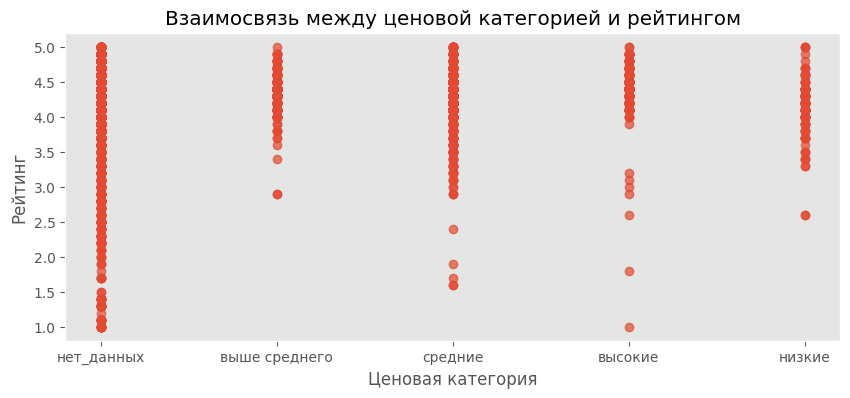

In [115]:
# строю диаграмму рассеяния для category_price и rating = 0.29

# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(two_join_df['category_price'],
         two_join_df['rating'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между ценовой категорией и рейтингом')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
plt.grid()


# Отображаем график
plt.show()

Тут на графике четко видно, что для ценовых категорий есть большой диапапзон данных. Например, у категорий Средние рейтиг заведений варьируется от 1.5 до 5.0, у категории Высокие от 1.0 до 5.0. В диапазоне начиная от 3.0 до 5.0 попадают категории Выше среднего, от 2.5 до 5.0 Низкие. У заведений с такими ценовыми категориями практически отсутствуют плохие оценки (1.0-2.0). Больше всего оценок рейтинга в диапазоне от 3.5 до 5.0.



In [116]:
two_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8398 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8398 non-null   object 
 1   type               8398 non-null   object 
 2   address            8398 non-null   object 
 3   district           8398 non-null   object 
 4   hours              8398 non-null   object 
 5   rating             8398 non-null   float64
 6   chain              8398 non-null   int8   
 7   seats              4757 non-null   float64
 8   category_price     8398 non-null   object 
 9   avg_bill           8398 non-null   object 
 10  middle_avg_bill    3148 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  is_24_7            8398 non-null   object 
dtypes: float64(4), int8(1), object(8)
memory usage: 861.1+ KB


**Вывод**: вывела таблицу с коэффициентом пхик, построила хитмэп матрицы корреляции. Обнаружила 3 взаимосвязи (корреляции):
- seats и type = 0.11 - проверю эту зависимость
- category_priice и type = 0.3
- category_price и rating = 0.29 - проверю эту зависимость

Первая зависимость имеет среднюю связь между столбцами. На грфике можно увидеть распределение кол-ва посадочных мест для категорий заведений. У всех категорий большой разброс значений. Слабая связь. 

Я не стала проверять вторую взаимосвязь т к значения почти одинаковые, поэтому проверила сразу третью. На графике видно, что для ценовых категорий есть большой диапапзон данных. Больше всего оценок рейтинга в диапазоне от 3.5 до 5.0.

7. Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [117]:
# новый дф, который содержит только сетевые зваедения
new_data_chain = two_join_df[two_join_df['chain'] == 1]

In [118]:
# группирую и сортирую данные, вывожу топ 15 и средние рейтинги

group_names = new_data_chain.groupby(['name', 'type']).agg({
    'chain': 'count',
    'rating': 'mean'
})
group_sort = group_names.sort_values(by='chain', ascending=False)
group_sort = group_sort.head(15)
group_sort

,,chain,rating
name,type,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


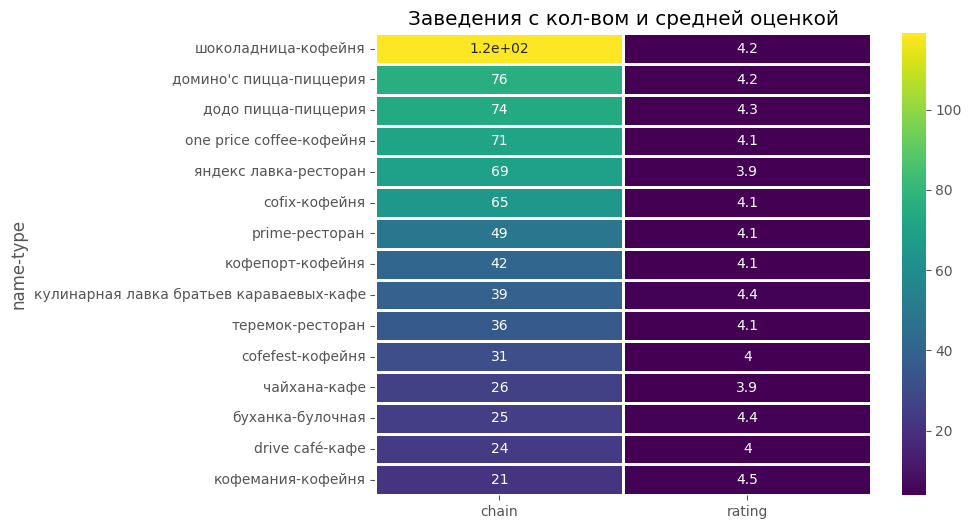

In [119]:
# в желтом квадрате непонятное значение, а должно отображаться 109. не знаю почему так
plt.figure(figsize=(8, 6))
sns.heatmap(group_sort, annot=True, cmap='viridis', linewidths=1)
plt.title('Заведения с кол-вом и средней оценкой')
plt.show()

**Вывод**: больше всего в Москве популярны сети кофеен, пиццерий. По количеству работающих заведений лидирует сеть Шоколадница, далее Домино и Додо.

Топ-3 по количеству заведений сети:
- Шоколадница
- Доминос пицца
- Додо пицца

Топ-3 по рейтингу:
- Буханка
- Кулинарная лавка братьев караваевых
- Додо пицца

Топ-3 по категории заведений (по количеству заведений):
- Кофейня
- Пиццерия
- Пиццерия
- Ресторан (Яндекс лавка) странный тип для доставки...может имели ввиду "доставка из ресторана домой"

8. Изучите вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.

In [120]:
# средний чек с Nan
mean_check = round(two_join_df.groupby('district')['middle_avg_bill'].mean(), 2)
sort_check = mean_check.sort_values(ascending=False)
sort_check

district
центральный административный округ         1192.18
западный административный округ            1053.23
северный административный округ             927.96
южный административный округ                834.40
северо-западный административный округ      822.22
восточный административный округ            820.63
юго-западный административный округ         792.56
северо-восточный административный округ     716.61
юго-восточный административный округ        654.10
Name: middle_avg_bill, dtype: float64

In [121]:
# фильтрую данные middle_avg_bill

# тут убираю пропуски из middle_avg_bill и создаю новое название middle_avg_bill_nan
# дф middle_avg_bill_nan использую только в этой задаче
middle_avg_bill_nan = two_join_df.dropna(subset=['middle_avg_bill'])

In [122]:
# средний чек с отфильтрованными данными (вывел такой же результат)
mean_check_2 = round(middle_avg_bill_nan.groupby('district')['middle_avg_bill'].mean(), 2)
sort_check_2 = mean_check_2.sort_values(ascending=False)
sort_check_2

district
центральный административный округ         1192.18
западный административный округ            1053.23
северный административный округ             927.96
южный административный округ                834.40
северо-западный административный округ      822.22
восточный административный округ            820.63
юго-западный административный округ         792.56
северо-восточный административный округ     716.61
юго-восточный административный округ        654.10
Name: middle_avg_bill, dtype: float64

Заглушку удалила в задаче 6. Заменила пропуски полю middle_avg_bill на средние значения по категориям. Средний чек выглядит теперь нормально.

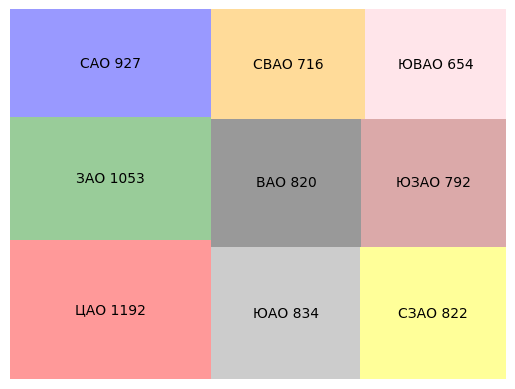

In [123]:
squarify.plot(sizes=[1192,1053,927,834,822,820,792,716,654], label=["ЦАО 1192", "ЗАО 1053", "САО 927", 
                                                                  "ЮАО 834", "СЗАО 822", "ВАО 820", 
                                                                  "ЮЗАО 792", "СВАО 716", "ЮВАО 654"], 
              color=["red","green","blue", "grey", "yellow", "black", "brown", "orange", "pink"], alpha=.4 )
plt.axis('off')
plt.show()

Усредненный средний чек можно разделить на 3 категории:
- ЦАО имеет самый дорогой средний чек т к центральная часть Москвы
- в ЗАО, СЗАО, САО, ЮЗАО многие заведения расположены ближе к центру Москвы (удобнее добираться, лучше расположение) поэтому тут выше чеки
- ВАО, СВАО, ЮВАО, ЮАО - заведения удалены от ЦАО 

9. При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.

In [124]:
# новый дф, который содержит только круглосуточные зваедения
data_14_7 = two_join_df[two_join_df['is_24_7'] == 'True']

In [125]:
# проверяю кол-во круглосуточных заведений в Москве
count_24 = data_14_7.groupby('district')['name'].count()
sort_count_24 = count_24.sort_values(ascending=False)
sort_count_24

district
центральный административный округ         130
восточный административный округ            97
юго-восточный административный округ        93
северо-восточный административный округ     75
южный административный округ                75
юго-западный административный округ         73
западный административный округ             72
северный административный округ             71
северо-западный административный округ      43
Name: name, dtype: int64

Ну тут вывод прост: чем центральнее расположено заведение, тем боьше шансов что оно будет круглосуточным. Не так много заведений работают круглосутчно, большевсего таких заведений находится в ЦАО и в восточной части города.

## Общий вывод

<a id="14"></a>

- Предобработала данные, объедининла 2 датафрейма, удалила пропуски, привела столбцы к нужному типу данных, заменила пропуски на индикаторы и словосочетания в столбцах у которых тип данных object, избавилась от выбросов.
- При анализе данных было выявлено:
   * больше всего круглосуточных заведений в ЦАО, а мньше всего в СЗАО
   * по москве много сетевых заведений со средним рейтингом 4+
   * по Москве преобладают небольшие заведения (сетевые и нет) со средним, небольшим кол-вом посадочных мест
   * несетевых заведений больше, чем сетевых
   * популярные категории заведений это кафе, рестораны и кофейни, при этом в ЦАО больше ресторанов, а категория кафе отстает на треть

 Рекомендации: рекомедую ориентироваться больше на заведения типа кафе, кофейня. Эти категории пользуются спросом, даже с учетом большого кол-ва работающих заведений. В ЦАО, ЗАО, САО, СЗАО, ЮАО выше средний чек. 

### Новый общий вывод 

<a id="15"></a>

**Вопросы из брифа проекта:**
    
- Какие **категории заведений** представлены в данных? Исследуйте количество объектов общественного питания по каждой категории.

В данных представлены категории: 
- кафе - 2376
- ресторан - 2042
- кофейня - 1412
- бар,паб - 764
- пиццерия - 633
- быстрое питание - 603
- столовая - 315
- булочная - 256

- Какие **административные районы** Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, 
- а также отдельно распределение заведений каждой категории в **Центральном административном округе** Москвы.

Распределение кол-ва заведений по Москве:
- центральный административный округ - 2241
- северный административный округ - 898
- южный административный округ - 892
- северо-восточный административный округ - 890
- западный административный округ - 850
- восточный административный округ - 98
- юго-восточный административный округ - 714
- юго-западный административный округ - 709
- северо-западный административный округ - 409

В ЦАО распределение такое:
- ресторан - 670
- кафе - 464
- кофейня - 427
- бар,паб - 364
- пиццерия - 113
- быстрое питание - 87
- столовая - 66
- булочная - 50
 
Изучите соотношение **сетевых и несетевых** заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых?
   
* 0 - (5199) 61.9% (несетевые заведения)
* 1 - (3202) 38.1% (сетевые заведения)
  
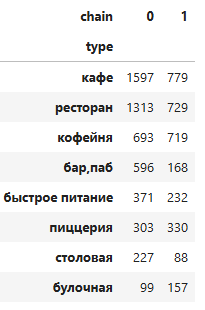

- Какие категории заведений чаще являются сетевыми?
- булочная - 61%
- пиццерия - 52%
- кофейня - 51%
- быстрое питание - 38%
- ресторан - 36%
- кафе - 33%
- столовая - 28%
- бар,паб - 22%

По процентному соотношению между сетевыми заведениями: первое место занимает категория "Булочная". Заведения данной категории чаще являются сетевыми (61%). Второе и третье места это категории "Пиццерия" и "Кофейня" (52% и 51%). На последнем месте категория "Бар, паб" (22%)

- Исследуйте **количество посадочных мест** в заведениях. Встречаются ли в данных аномальные значения или выбросы?

В данных много пропусков, есть аномальные значения, 1288, 1200, 1040, 920. Самые большие аномальные значения я заменила на 129, 120 и т д, потому что при по иске в инете этих заведений, в описании у нех не было информации о таком большом кол-ве мест. Пропуски в seats заменила на средние значения по категориям заведений.

Очень много выбросов с правой стороны (особенно в диапазоне от 220-320, точки плотно расположены друг к другу). Есть несколько выбросов в позиции 580-780.

- Если да, то с чем они могут быть связаны?

Есть несколько выбросов в позиции 580-780. Думаю, они влияют на медиану и тянут ее в правую сторону. Из-за этого данные распределены неравномерно. Если подумать, то в Москве точно есть заведения с большим кол-вом посадочных мест, например, для крупных торжеств. Возможно они не работают каждый день, но они точно есть.
  
Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест.
- ресторан - 86
- бар,паб - 80
- кофейня - 80
- столовая - 75
- быстрое питание - 65
- кафе - 60
- пиццерия - 54
- булочная - 50.


- Исследуйте **рейтинг заведений**. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Усредненные рейтинги заведений практически не отличаются:
- бар,паб - 4.39
- пиццерия - 4.31
- ресторан - 4.29
- кофейня - 4.28
- булочная - 4.27
- столовая - 4.21
- кафе - 4.11
- быстрое питание - 4.05

- Изучите, с какими данными показывают самую сильную **корреляцию рейтинги** заведений?

Выявила 3 сильных карреляции (но сомневаюсь что они верные):

По хитмэпу видно 3 карреляции:
- seats и type =  0.11 (было 0.5)  - проверю эту зависимость
- category_priice и type = 0.3 
- category_price и rating = 0.28 - проверю эту зависимость

Все зависимости положительные: 

- От категории заведения зависит количество посадочных мест.
- От ценовой категории завист тип заведения.
- От ценовой категории зависит рейтинг. 
  
- Выберите **самую сильную связь** и проверьте её.

Самая сильная связь между category_price и rating = 0.28

На графике категории столовая, булочная и быстрое питание имеют большой разброс значений. Я сильно сомневаюсь что есть булочные с количеством мест больше 175. 

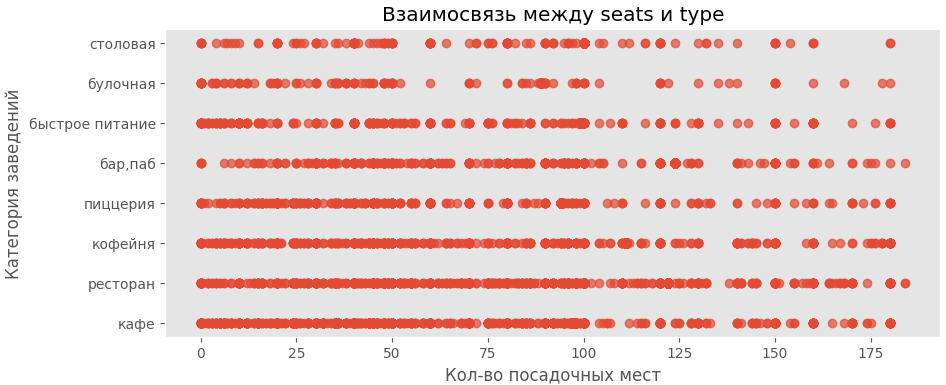

- Сгруппируйте данные по названиям заведений и найдите **топ-15** популярных сетей в Москве. Для них посчитайте значения **среднего рейтинга**. Под популярностью понимается количество заведений этой сети в регионе. К какой **категории** заведений они относятся?

Топ-15 по количеству заведений сети:

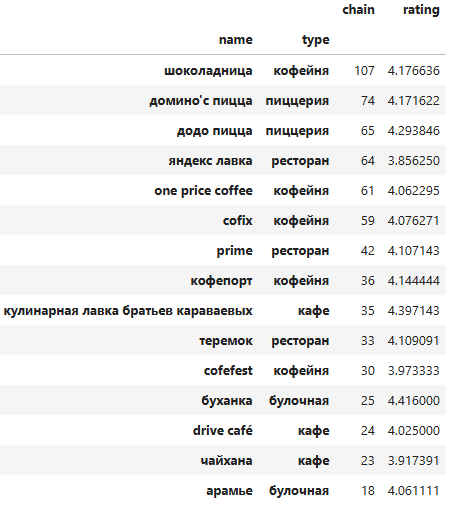

Топ-3 по количеству заведений сети:
- Шоколадница
- Доминос пицца
- Додо пицца

Топ-3 по рейтингу:
- Буханка
- Кулинарная лавка братьев караваевых
- Додо пицца

Топ-3 по категории заведений (по количеству заведений):
- Кофейня
- Пиццерия
- Пиццерия
  
Изучите вариацию **среднего чека** заведения в зависимости от района Москвы. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?
- ЦАО - 1192
- ЗАО - 1053
- СЗАО - 927
- САО - 834
- ЮЗАО - 822
- ВАО - 820
- СВАО - 792
- ЮВАО - 716
- ЮАО - 654


Усредненный средний чек можно разделить на 3 категории:
- ЦАО имеет самый дорогой средний чек т к центральная часть Москвы
- в ЗАО, СЗАО, САО, ЮЗАО многие заведения расположены ближе к центру Москвы (удобнее добираться, лучше расположение) поэтому тут выше чеки
- ВАО, СВАО, ЮВАО, ЮАО - заведения удалены от ЦАО     

## Реомендации

<a id="16"></a>

* Более выгодные районы для открытия нового заведения ЦАО, ЗАО. Средний чек тут самый высокий, это центр. Много людей и туристов, но нужно учитывать что будет высокая аренда помещения, а также высокая конкуренция, плюс кучу других факторов.
* Наибольшим спросом пользуются несетевые категории ресторан кафе, кофейни, а среди сетевых категорий это пиццерии и кофейни. Эти категории пользуются спросом больше, потомому что можно комфортно провести время и поесть в комфортной обстановке, например, в пиццерию пойти всей семьей, а в кафе или ресторан сходить в обеденное время или после работы. Там чаще всего может быть тихо
* Я бы рекомендовала делать круглосуточное заведение в ЦАО (их 130), ВАО (97). Их не так много, и конкуренция будет намного меньше. Но если рассматривать другие районы, то не рекомендовала бы делать круглосуточное заведение, потому что думаю, спрос не такой большой с пн по пт. Плюс в Москве метро не круглосуточно работает, это еще один большой минус.
* Преимущества и недостатки сетевых и несетевых заведений: "+" сетевые заведения чаще узнают, их может быть много по городу и люди о них знают. Может сформировавться привычка ходить в одни и те же знакомые сети. "+-"В сети одинаковый ассортимент везде. "-" Может наскучить малая выборка товаров. "+" Несетевые заведения уникальны, легко переделать интерьер, придумать новое направление для развития. "-" Нужно больше развивать бренд, чтобы поток людей неуменьшался. Высокая конкуренция. Рост цен в аналогичных заведениях.
* Кол-во посадочных мест для для разных категорий заведений: в центре города думаю должно быть больше посадочных мест и в сетевых, и в несетевых заведениях. В отдаленных районах, достаточно меньшего кол-ва посадочных мест, т к там мала вероятность большого потока людей.

Вот аналитические данные по Москве:
- ресторан - 122
- бар,паб - 120
- кофейня - 111
- столовая - 100
- быстрое питание - 99
- кафе - 97
- пиццерия - 94
- булочная - 89

* Если заказчик ориентируется на открытие:
  * заведения высокого ценового сегмента - рекомендую районы ЦАО, ВАО, тут часто пользуются спросом уникальные, дорогие несетевые заведения
  * заведения среднего ценового сегмента - рекомендую районы ЗАО, СЗАО, САО, ЮЗАО, семейные заведения, рестораны, кафе тут пользуются спросом
  * заведения бюджетного ценового сегмента - рекомендую районы ВАО, СВАО, ЮВАО, ЮАО, можно открыть заведение быстрого питания, недорогое кафе.